<a id='top'></a>
## Wrangle and Analyze Data
by: Laszlo Rado, 03-08-2020
### Project Submission for Udacity: Data Analysit Nanodegree Program

#### Table of Content:


a) [Project Motivation and Task](#intro)

b) Data wrangling, which consists of:
- [Gathering data](#gather)
- [Assessing data](#assess)
- [Cleaning data](#clean)

c) [Storing, analyzing, and visualizing](#analyse)

d) [Reporting on your data wrangling efforts and your data analyses and visualizations - In separate pdf documents](#report)


<a id='intro'></a>
### Project Motivation:
Your goal: wrangle WeRateDogs Twitter data to create interesting and trustworthy analyses and visualizations. The Twitter archive is great, but it only contains very basic tweet information. Additional gathering, then assessing and cleaning is required for "Wow!"-worthy analyses and visualizations.



<a id='gather'></a>
## Gather

#### Data will be gathered from the following sources:
##### 1) The WeRateDogs Twitter archive
Twitter archive, downloaded and sent by the owner of the WeRateDogs account.

Download twitter_archive_enhanced.csv manually from the following url 
    
https://d17h27t6h515a5.cloudfront.net/topher/2017/August/59a4e958_twitter-archive-enhanced/twitter-archive-enhanced.csv

##### 2) The tweet image predictions
Neural network prediction of dog breed based on twitter picture.

Download image_predictions.tsv programatically using the requests library from the following url

https://d17h27t6h515a5.cloudfront.net/topher/2017/August/599fd2ad_image-predictions/image-predictions.tsv

##### 3) Additional twitter data
Using the tweet IDs in the WeRateDogs Twitter archive, query the Twitter API for each tweet's JSON data using Python's Tweepy library and store each tweet's entire set of JSON data in a file called tweet_json.txt file.

Then read this .txt file line by line into a pandas DataFrame with (at minimum) tweet ID, retweet count, and favorite count.

Documentation: http://www.tweepy.org/


In [291]:
#importing all libraries necessary for the project
from tqdm import tqdm_notebook
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import requests
import tweepy
import json
import time

In [292]:
#reading the content of the manually downloaded twitter_archive_enhanced.csv file into a Pandas DataFrame object
tw_arch = pd.read_csv('twitter-archive-enhanced.csv')
tw_arch.head(2)

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,None,None,None,None
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,None,None,None,None


In [293]:
#Programatically download the tweet image predictions (image_predictions.tsv) file
file_name = 'image_predictions.tsv'
image_predictions_url = 'https://d17h27t6h515a5.cloudfront.net/topher/2017/August/599fd2ad_image-predictions/image-predictions.tsv'
response = requests.get(image_predictions_url)
with open(file_name, mode='wb') as file:
    file.write(response.content)

In [294]:
#reading the content of the programatically downloaded image_predictions.tsv file into a Pandas DataFrame object
img_pred = pd.read_csv('image_predictions.tsv', sep='\t')
img_pred.head()

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,Welsh_springer_spaniel,0.465074,True,collie,0.156665,True,Shetland_sheepdog,0.061428,True
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,redbone,0.506826,True,miniature_pinscher,0.074192,True,Rhodesian_ridgeback,0.072010,True
2,666033412701032449,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,1,German_shepherd,0.596461,True,malinois,0.138584,True,bloodhound,0.116197,True
3,666044226329800704,https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg,1,Rhodesian_ridgeback,0.408143,True,redbone,0.360687,True,miniature_pinscher,0.222752,True
4,666049248165822465,https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg,1,miniature_pinscher,0.560311,True,Rottweiler,0.243682,True,Doberman,0.154629,True


In [295]:
#1) Set up the Twitter API using Python's Tweepy library 
#
consumer_key = ''
consumer_secret = ''

auth = tweepy.AppAuthHandler(consumer_key, consumer_secret)
api = tweepy.API(auth)

In [296]:
#2) Read and Store each tweet's entire set of JSON data in one line of a file called tweet_json.txt

if False:
    counter = 0
    file_name = 'tweet_json.txt'
    incorrect_ids = []

    with open(file_name, mode='w') as file:
        for tweet_id in tqdm_notebook(tw_arch.tweet_id):
            try:
                tweet = api.get_status(tweet_id, tweet_mode='extended',
                                       wait_on_rate_limit=True, wait_on_rate_limit_notify=True)
            except:
                counter += 1
                print("\rNumber of tweet IDs with no corresponding tweet: " + str(counter), end="")
                incorrect_ids.append(tweet_id)
                continue
            tweet_json = str(json.dumps(tweet._json))
            file.write(tweet_json + '\n')

In [297]:
#3) Read tweet_json.txt file line by line into a pandas DataFrame ,
# at minimum tweet ID, retweet count, and favorite count.

file_name = 'tweet_json.txt'

tw_additional = []

with open(file_name, mode='r') as file:
    
    for line in file:
        tweet_json = json.loads(line)
        id_of_tweet = tweet_json['id']
        tw_additional.append({'id_of_tweet' : tweet_json['id'],
                      'retweet_count': tweet_json['retweet_count'],
                      'favorite_count' : tweet_json['favorite_count'],
                      'followers_count': tweet_json['user']['followers_count']})

tw_additional = pd.DataFrame(tw_additional, columns=['id_of_tweet', 'retweet_count', 'favorite_count', 'followers_count'])      
tw_additional.sample(5)

,id_of_tweet,retweet_count,favorite_count,followers_count
2295,666437273139982337,42,115,8816479
1269,708026248782585858,1902,4332,8815801
1157,719332531645071360,929,3374,8816463
1773,677228873407442944,1593,3455,8816466
1973,672538107540070400,344,987,8815818


<a id='assess'></a>
[Table of content](#top)
## Assess

After gathering each of the above pieces of data, assess them visually and programmatically for quality and tidiness issues.

Detect and document at least eight (8) quality issues and two (2) tidiness issues in your wrangle_act.ipynb Jupyter Notebook.



##### To meet specifications, the issues that satisfy the Project Motivation (see the Key Points header on the previous page) must be assessed.
    a) You only want original ratings (no retweets) that have images. Though there are 5000+ tweets in the dataset, not all are dog ratings and some are retweets.
    
    b) You do not need to gather the tweets beyond August 1st, 2017. You can, but note that you won't be able to gather the image predictions for these tweets since you don't have access to the algorithm used.
    
    c) Cleaning includes merging individual pieces of data according to the rules of tidy data.

#### Assessing the tw_arch (twitter-archive-enhanced.csv) dataframe

In [298]:
#Visually observing 5 random samples from the dataset
#to get a feel about the data, the columns and the type of records it has
#I have also opened the file in Microsoft Excell and scrolled through it for the same purpose

tw_arch.sample(5)

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
1720,680145970311643136,NaN,NaN,2015-12-24 22:00:10 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Say hello to Kawhi. He was doing fine until hi...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/680145970...,10,10,Kawhi,None,None,pupper,None
1204,716080869887381504,NaN,NaN,2016-04-02 01:52:38 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Here's a super majestic doggo and a sunset 11/...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/716080869...,11,10,None,doggo,None,None,None
547,805520635690676224,NaN,NaN,2016-12-04 21:14:20 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Zeke the Wonder Dog. He never let that...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/805520635...,13,10,Zeke,None,None,None,None
1828,676263575653122048,NaN,NaN,2015-12-14 04:52:55 +0000,"<a href=""http://twitter.com/download/iphone"" r...",All this pupper wanted to do was go skiing. No...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/676263575...,10,10,None,None,None,pupper,None
1290,708130923141795840,NaN,NaN,2016-03-11 03:22:23 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Please stop sending in non canines like this G...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/708130923...,11,10,None,None,None,None,None


In [299]:
#Checking the number of unique values for each column
tw_arch.nunique()

tweet_id                      2356
in_reply_to_status_id           77
in_reply_to_user_id             31
timestamp                     2356
source                           4
text                          2356
retweeted_status_id            181
retweeted_status_user_id        25
retweeted_status_timestamp     181
expanded_urls                 2218
rating_numerator                40
rating_denominator              18
name                           957
doggo                            2
floofer                          2
pupper                           2
puppo                            2
dtype: int64

In [300]:
#Checking what are the distinct values for the source column
tw_arch.source.value_counts()

<a href="http://twitter.com/download/iphone" rel="nofollow">Twitter for iPhone</a>     2221
<a href="http://vine.co" rel="nofollow">Vine - Make a Scene</a>                          91
<a href="http://twitter.com" rel="nofollow">Twitter Web Client</a>                       33
<a href="https://about.twitter.com/products/tweetdeck" rel="nofollow">TweetDeck</a>      11
Name: source, dtype: int64

In [301]:
#Checking for missing values, the number of non-null values and data types
tw_arch.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2356 entries, 0 to 2355
Data columns (total 17 columns):
tweet_id                      2356 non-null int64
in_reply_to_status_id         78 non-null float64
in_reply_to_user_id           78 non-null float64
timestamp                     2356 non-null object
source                        2356 non-null object
text                          2356 non-null object
retweeted_status_id           181 non-null float64
retweeted_status_user_id      181 non-null float64
retweeted_status_timestamp    181 non-null object
expanded_urls                 2297 non-null object
rating_numerator              2356 non-null int64
rating_denominator            2356 non-null int64
name                          2356 non-null object
doggo                         2356 non-null object
floofer                       2356 non-null object
pupper                        2356 non-null object
puppo                         2356 non-null object
dtypes: float64(4), int64(3), ob

In [302]:
#Number of unique values and number of non-null values are different for the expanded_urls column
#Checking whether we have duplicates
tw_arch.expanded_urls[(tw_arch.expanded_urls.duplicated()) & (~tw_arch.expanded_urls.isnull())].head()

75     https://www.gofundme.com/3yd6y1c,https://twitt...
76     https://twitter.com/dog_rates/status/878057613...
98     https://www.gofundme.com/help-my-baby-sierra-g...
126    https://www.gofundme.com/3ti3nps,https://twitt...
135    https://twitter.com/dog_rates/status/866450705...
Name: expanded_urls, dtype: object

In [303]:
#taking a closer look at one specific duplication (index 73 and 75)
tw_arch.iloc[73]

tweet_id                                                     878404777348136964
in_reply_to_status_id                                                       NaN
in_reply_to_user_id                                                         NaN
timestamp                                             2017-06-24 00:09:53 +0000
source                        <a href="http://twitter.com/download/iphone" r...
text                          RT @dog_rates: Meet Shadow. In an attempt to r...
retweeted_status_id                                                 8.78282e+17
retweeted_status_user_id                                            4.19698e+09
retweeted_status_timestamp                            2017-06-23 16:00:04 +0000
expanded_urls                 https://www.gofundme.com/3yd6y1c,https://twitt...
rating_numerator                                                             13
rating_denominator                                                           10
name                                    

In [304]:
tw_arch.iloc[75]

tweet_id                                                     878281511006478336
in_reply_to_status_id                                                       NaN
in_reply_to_user_id                                                         NaN
timestamp                                             2017-06-23 16:00:04 +0000
source                        <a href="http://twitter.com/download/iphone" r...
text                          Meet Shadow. In an attempt to reach maximum zo...
retweeted_status_id                                                         NaN
retweeted_status_user_id                                                    NaN
retweeted_status_timestamp                                                  NaN
expanded_urls                 https://www.gofundme.com/3yd6y1c,https://twitt...
rating_numerator                                                             13
rating_denominator                                                           10
name                                    

In [305]:
#Checking for the range of values for the numeric columns 
#(focusing on the numerator and denominator columns and ignoring the IDs)
tw_arch[['rating_numerator', 'rating_denominator']].describe()

,rating_numerator,rating_denominator
count,2356.000000,2356.000000
mean,13.126486,10.455433
std,45.876648,6.745237
min,0.000000,0.000000
25%,10.000000,10.000000
50%,11.000000,10.000000
75%,12.000000,10.000000
max,1776.000000,170.000000


In [306]:
#Check whether any of the columns include any null values
tw_arch.isnull().any()

tweet_id                      False
in_reply_to_status_id          True
in_reply_to_user_id            True
timestamp                     False
source                        False
text                          False
retweeted_status_id            True
retweeted_status_user_id       True
retweeted_status_timestamp     True
expanded_urls                  True
rating_numerator              False
rating_denominator            False
name                          False
doggo                         False
floofer                       False
pupper                        False
puppo                         False
dtype: bool

#### Assessing the img_pred (image_predictions.tsv) dataframe

In [307]:
#Visually observing 5 random samples from the dataset
#to get a feel about the data, the columns and the type of records it has
#I have also opened the file in Microsoft Excell and scrolled through it for the same purpose

img_pred.sample(5)

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
465,675006312288268288,https://pbs.twimg.com/media/CV4aqCwWsAIi3OP.jpg,1,boxer,0.654697,True,space_heater,0.043389,False,beagle,0.042848,True
2054,888078434458587136,https://pbs.twimg.com/media/DFMWn56WsAAkA7B.jpg,1,French_bulldog,0.995026,True,pug,0.000932,True,bull_mastiff,0.000903,True
1828,835574547218894849,https://pbs.twimg.com/media/C5iOnigWcAAU3Ry.jpg,1,Staffordshire_bullterrier,0.610655,True,muzzle,0.132138,False,American_Staffordshire_terrier,0.109544,True
1048,713411074226274305,https://pbs.twimg.com/media/CeaLlAPUMAIcC7U.jpg,1,Great_Pyrenees,0.720337,True,Samoyed,0.129542,True,kuvasz,0.122451,True
333,672160042234327040,https://pbs.twimg.com/media/CVP9_beUEAAwURR.jpg,1,pug,0.561027,True,French_bulldog,0.222114,True,Labrador_retriever,0.065456,True


In [308]:
#Checking the number of unique values for each column
img_pred.nunique()

tweet_id    2075
jpg_url     2009
img_num        4
p1           378
p1_conf     2006
p1_dog         2
p2           405
p2_conf     2004
p2_dog         2
p3           408
p3_conf     2006
p3_dog         2
dtype: int64

In [309]:
#Combining the p1, p2, p3 columns into one single list and Checking what are the distinct values
#sorting it by index, and showing them in 50pc chunks to see whether there are any similar / duplicate breeds or
#incorrect / strange values pop up in the list

p_all = img_pred.p1.append(img_pred.p2).append(img_pred.p3)
p_all.value_counts().sort_index()[150:200]

bluetick            16
boathouse            3
bobsled              1
bolete               2
bonnet               2
book_jacket          3
bookcase             4
bookshop             1
borzoi              28
bow                  3
bow_tie              7
box_turtle           5
boxer               39
brass                2
breakwater           1
breastplate          1
briard               9
broccoli             1
brown_bear           6
bubble               5
bucket               3
buckeye              1
bull_mastiff        39
bulletproof_vest     1
bullfrog             1
bustard              2
cab                  2
cairn               13
can_opener           2
candle               1
cannon               1
canoe                3
car_mirror           6
car_wheel            2
cardigan             1
cardoon              1
carousel             1
carton               7
cash_machine         5
chain                1
chain_mail           1
chain_saw            2
cheeseburger         1
cheetah    

In [310]:
#Checking for missing values, the number of non-null values and data types
img_pred.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2075 entries, 0 to 2074
Data columns (total 12 columns):
tweet_id    2075 non-null int64
jpg_url     2075 non-null object
img_num     2075 non-null int64
p1          2075 non-null object
p1_conf     2075 non-null float64
p1_dog      2075 non-null bool
p2          2075 non-null object
p2_conf     2075 non-null float64
p2_dog      2075 non-null bool
p3          2075 non-null object
p3_conf     2075 non-null float64
p3_dog      2075 non-null bool
dtypes: bool(3), float64(3), int64(2), object(4)
memory usage: 152.1+ KB


In [311]:
#Checking if the tweet ids have all the same length (stored as int, so potential missing leading zeros)
img_pred.tweet_id.apply(lambda x: len(str(x))).value_counts()

18    2075
Name: tweet_id, dtype: int64

In [312]:
#Checking for the range of values for the numeric columns 
#(focusing on the p1, p2 and p3 confidence columns and ignoring the ID and image number)
img_pred[['p1_conf', 'p2_conf', 'p2_conf']].describe()

,p1_conf,p2_conf,p2_conf
count,2075.000000,2.075000e+03,2.075000e+03
mean,0.594548,1.345886e-01,1.345886e-01
std,0.271174,1.006657e-01,1.006657e-01
min,0.044333,1.011300e-08,1.011300e-08
25%,0.364412,5.388625e-02,5.388625e-02
50%,0.588230,1.181810e-01,1.181810e-01
75%,0.843855,1.955655e-01,1.955655e-01
max,1.000000,4.880140e-01,4.880140e-01


In [313]:
#Checking whethet the sum of p1_conf, p2_conf and p3_conf columns are aways smaller than 1 
#(overall probability can't be greater than 1)
img_pred['total_conf'] = img_pred['p1_conf'] + img_pred['p2_conf'] + img_pred['p3_conf']
img_pred[img_pred['total_conf'] > 1]
#since p2_conf andp3_conf are extremely small values, it is probably due to rounding error, but since it is only 1 record,
#and no dog_breed identified, let's drop it.

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog,total_conf
106,667866724293877760,https://pbs.twimg.com/media/CUS9PlUWwAANeAD.jpg,1,jigsaw_puzzle,1.0,False,prayer_rug,1.011300e-08,False,doormat,1.740170e-10,False,1.0


In [314]:
#Check whether any of the columns include any null values
img_pred.isnull().any()

tweet_id      False
jpg_url       False
img_num       False
p1            False
p1_conf       False
p1_dog        False
p2            False
p2_conf       False
p2_dog        False
p3            False
p3_conf       False
p3_dog        False
total_conf    False
dtype: bool

#### Assessing the tw_additional (via Twitter API) dataframe

In [315]:
#Visually observing 5 random samples from the dataset
#to get a feel about the data, the columns and the type of records it has

tw_additional.sample(5)

,id_of_tweet,retweet_count,favorite_count,followers_count
468,814638523311648768,2713,11360,8816455
1127,725842289046749185,2619,6960,8816463
132,865718153858494464,5207,24280,8816453
1694,680176173301628928,1520,3835,8816466
754,776249906839351296,9151,0,8816456


In [316]:
#Checking for missing values, the number of non-null values and data types
tw_additional.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2331 entries, 0 to 2330
Data columns (total 4 columns):
id_of_tweet        2331 non-null int64
retweet_count      2331 non-null int64
favorite_count     2331 non-null int64
followers_count    2331 non-null int64
dtypes: int64(4)
memory usage: 72.9 KB


In [317]:
#Checking whether we have any Null values in any of the columns
tw_additional.isnull().any()

id_of_tweet        False
retweet_count      False
favorite_count     False
followers_count    False
dtype: bool

In [318]:
#Checking for the range of values for the numeric columns 
#(focusing on the retweet_count and favorite_count columns and ignoring the ID)
tw_additional[['retweet_count', 'favorite_count', 'followers_count']].describe()

,retweet_count,favorite_count,followers_count
count,2331.000000,2331.000000,2.331000e+03
mean,2671.531961,7491.279708,8.816294e+06
std,4517.667201,11626.833414,2.895570e+02
min,1.000000,0.000000,8.815791e+06
25%,541.500000,1303.000000,8.815818e+06
50%,1251.000000,3259.000000,8.816456e+06
75%,3106.500000,9176.500000,8.816463e+06
max,76794.000000,154564.000000,8.816480e+06


### Quality issues captured:

##### tw_arch:
    1) DONE - source column includes html tags and urls
    2) DONE - dog stage (doggo, floofer, pupper, puppo) columns are captured as string (Object)
    3) DONE - some records has been tagged with multiple dog stage category
    4) DONE - timestamp column captured as string (Object)
    5) DONE - rating_numerator data type is integer, but there are decimal values in the original text (see row46)    
    

##### img_pred:
    6) DONE - p1, p2, p3 columns include a large number of non-dog-breed values
    7) DONE - p1, p2, p3 columns: dog breed format is not consistent (upper/lower case, space/underscore)
    8) DONE - total probability (p1_conf + p2_conf + p3_conf) for record with tweet_id 667866724293877760 is greater than 1, also no dog breed was identified so let's drop record
   
##### tw_additional:
    9) Column name id_of_tweet is not consistent with the other tables (tweet_id)

### Tidiness issues captured:

##### tw_arch:
    1) DONE - expanded urls column includes multiple urls
    2) DONE - unnecessary columns included in the dataset: retweet and reply columns 
    3) DONE - doggo, floofer, pupper, puppo columns can be merged into 1 column

##### img_pred:
    4) DONE - p1, p2, p3 columns can be merged into one
    
##### tw_additional:
    no tidiness issues noticed

##### Overall:
    5) the above three tables form 1 single observational unit


<a id='clean'></a>
[Table of content](#top)
## Clean

Clean each of the issues you documented while assessing. Perform this cleaning in wrangle_act.ipynb as well. 

The result should be a high quality and tidy master pandas DataFrame (or DataFrames, if appropriate). Again, the issues that satisfy the Project Motivation must be cleaned.



In [319]:
#making a copy of all three dataframes before cleaning
tw_arch_clean = tw_arch.copy()
img_pred_clean = img_pred.copy()
tw_additional_clean = tw_additional.copy()

#### Define:
1) extract multiple urls from the source column of the tw_arch dataframe into individual records of a separate dataframe, than drop 'expanded_urls' column from original dataframe

#### Code:

In [320]:
expanded_urls = pd.DataFrame(columns=[['tweet_id', 'url']])
index_of_errors = []

for index, row in tw_arch_clean.iterrows():
    try:
        temp_urls = pd.DataFrame(columns=[['tweet_id', 'url']])
        temp_urls['url'] = tw_arch_clean.loc[index, 'expanded_urls'].split(',')
        temp_urls['tweet_id'] = tw_arch_clean.loc[index, 'tweet_id']
        expanded_urls = expanded_urls.append(temp_urls, ignore_index=True)
    except:
        index_of_errors.append(index)
        
tw_arch_clean.drop('expanded_urls', axis=1, inplace=True)

#### Test:

In [321]:
#making sure the expanded_urls dataframe has been captured correctly
expanded_urls.tail(10)

,tweet_id,url
3392,666058600524156928,https://twitter.com/dog_rates/status/666058600...
3393,666057090499244032,https://twitter.com/dog_rates/status/666057090...
3394,666055525042405380,https://twitter.com/dog_rates/status/666055525...
3395,666051853826850816,https://twitter.com/dog_rates/status/666051853...
3396,666050758794694657,https://twitter.com/dog_rates/status/666050758...
3397,666049248165822465,https://twitter.com/dog_rates/status/666049248...
3398,666044226329800704,https://twitter.com/dog_rates/status/666044226...
3399,666033412701032449,https://twitter.com/dog_rates/status/666033412...
3400,666029285002620928,https://twitter.com/dog_rates/status/666029285...
3401,666020888022790149,https://twitter.com/dog_rates/status/666020888...


In [322]:
#making sure the 'expanded_urls' column has been dropped correctly
tw_arch_clean.head(1)

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,NaN,NaN,NaN,13,10,Phineas,None,None,None,None


#### Define:

    a) Remove the records related to re-tweets and replies
    b) Drop columns related to re-tweets and replies

#### Code a):

In [323]:
#Drop reply or retweet records
tw_arch_clean = tw_arch_clean[(tw_arch_clean['in_reply_to_status_id'].isnull()) & (tw_arch_clean['retweeted_status_id'].isnull())]


#### Test a):

In [324]:
#Checking whether all non-Null values have been correctly dropped from both columns
tw_arch_clean['in_reply_to_status_id'].isnull().value_counts()
tw_arch_clean['retweeted_status_id'].isnull().value_counts()

True    2097
Name: retweeted_status_id, dtype: int64

#### Code b):

In [325]:
#Drop columns related to retweets and replys
#in_reply_to_status_id, in_reply_to_user_id, retweeted_status_id, retweeted_status_user_id, retweeted_status_timestamp
tw_arch_clean.drop(['in_reply_to_status_id', 'in_reply_to_user_id', 'retweeted_status_id', 'retweeted_status_user_id', 
                     'retweeted_status_timestamp'], axis=1, inplace=True)

#### Test b):

In [326]:
#Making sure the columns have been dropped correctly
tw_arch_clean.head(0)

,tweet_id,timestamp,source,text,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo


#### Define:

    a) Manually pick dog stage for records with more than one category.
    b) Combine doggo, floofer, pupper, puppo columns into one single column.
    c) Drop original columns.
    d) Change column data type from String(Object) to Category.

#### Code a):

In [327]:
#Check if there are columns with multiple tags
test_df = ((tw_arch_clean['doggo'] == 'None').astype('int') + (tw_arch_clean['floofer'] == 'None').astype('int') 
+ (tw_arch_clean['pupper'] == 'None').astype('int') + (tw_arch_clean['puppo'] == 'None').astype('int'))

In [328]:
#Filtering on the records where at least two dog stage has been tagged.
test_df[test_df < 3].index

Int64Index([191, 200, 460, 531, 575, 705, 733, 889, 956, 1063, 1113], dtype='int64')

In [329]:
#Filtering on the above indexes one by one, observing the twitter text,
tw_arch_clean.loc[1113, 'text']

'Like father (doggo), like son (pupper). Both 12/10 https://t.co/pG2inLaOda'

In [330]:
#and manually deciding which dog-stage tag is correct, 
#and creating a list of index / dog-stage-tag list to make note of the decision
manual_dog_stage = [(191, 'puppo'), (200, 'doggo'), (460, 'pupper'), (531, 'pupper'), (575, 'pupper'), 
 (705, 'doggo'), (733, 'pupper'), (889, 'pupper'), (956, 'doggo'), (1063, 'pupper'), (1113, 'pupper')]

#### Code b):

In [331]:
#Combining the distinct columns into one single column, 
#using the .std.extract pandas function and regex to extract the values.
tw_arch_clean['dog_stage'] = tw_arch_clean['text'].str.extract('(doggo|floofer|pupper|puppo)')

In [332]:
#Applying the manual correction on the new 'dog_stage' column
for index, value in manual_dog_stage:
    tw_arch_clean.loc[index, 'dog_stage'] = value

#### Test a-b):

In [333]:
#Checking whether dog stage has been captured in the same way as before in separate columns
tw_arch_clean[['dog_stage', 'doggo', 'floofer', 'puppo', 'pupper']][~tw_arch_clean['dog_stage'].isnull()].head(5)

,dog_stage,doggo,floofer,puppo,pupper
9,doggo,doggo,None,None,None
12,puppo,None,None,puppo,None
14,puppo,None,None,puppo,None
29,pupper,None,None,None,pupper
43,doggo,doggo,None,None,None


In [334]:
#Checking whether manual corrections has been applied correctly
tw_arch_clean.loc[460, ['dog_stage', 'doggo', 'floofer', 'puppo', 'pupper']]

dog_stage    pupper
doggo         doggo
floofer        None
puppo          None
pupper       pupper
Name: 460, dtype: object

#### Code c):

In [335]:
#Dropping the original columns
tw_arch_clean.drop(columns=['doggo', 'floofer', 'pupper', 'puppo'], axis=1, inplace=True)

#### Test c):

In [336]:
tw_arch_clean.head(0)

,tweet_id,timestamp,source,text,rating_numerator,rating_denominator,name,dog_stage


#### Code d):

In [337]:
#Changing data type to category
tw_arch_clean['dog_stage'] = tw_arch_clean['dog_stage'].astype('category')

#### Test d):

In [338]:
#Checking whether data type update was successful
tw_arch_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2097 entries, 0 to 2355
Data columns (total 8 columns):
tweet_id              2097 non-null int64
timestamp             2097 non-null object
source                2097 non-null object
text                  2097 non-null object
rating_numerator      2097 non-null int64
rating_denominator    2097 non-null int64
name                  2097 non-null object
dog_stage             354 non-null category
dtypes: category(1), int64(3), object(4)
memory usage: 213.3+ KB


#### Define:
    a) Drop record with tweet_id 667866724293877760
    b) p1, p2, p3 columns of the img_pred dataframe can be merged into one column by keeping the column which was has the highest probability (p#_conf) among the three columns and also classified as dog (p#_dog).
    c) new column name should be more descriptive than the original column names.
    d) dropping original and other unnecessary columns including p1, p2, p3, p1_conf, p2_conf, p3_conf, p1_dog, p1_dog, p3_dog, total_conf, img_num
    e) Remove records with no dog breed identified in the 'predicted_dog_breed' column
    f) Change dog breed names first character to uppercase and remaining to lowercase. Also replace underscores and dashes with space to keep column values consistent.

#### Code a):

In [339]:
#Drop record with tweet_id 667866724293877760 (total confidence > 1, also no dog breed identified) 
img_pred_clean.drop(106, inplace=True)

#### Test a):

In [340]:
#See whether the record has been correctly removed
img_pred_clean[img_pred_clean['tweet_id'] == 667866724293877760]

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog,total_conf


#### Code b-c):

In [341]:
#Make sure that P1 has always higher confidence than P2 and P2 has always higher confidence than P3
print((img_pred_clean['p2_conf'] > img_pred_clean['p1_conf']).sum())
print((img_pred_clean['p3_conf'] > img_pred_clean['p2_conf']).sum())

0
0


In [342]:
#Looping through the dataframe and picking up the dog breed prediction with the highest confidence.
for i in img_pred_clean.index:
    if img_pred_clean.loc[i, 'p1_dog']:
        img_pred_clean.loc[i, 'predicted_dog_breed'] = img_pred_clean.loc[i, 'p1']    
    elif img_pred_clean.loc[i, 'p2_dog']:
            img_pred_clean.loc[i, 'predicted_dog_breed'] = img_pred_clean.loc[i, 'p2']
            
    elif img_pred_clean.loc[i, 'p3_dog']:
                img_pred_clean.loc[i, 'predicted_dog_breed'] = img_pred_clean.loc[i, 'p3']
            
    else:
        img_pred_clean.loc[i, 'predicted_dog_breed'] = np.NaN

#### Test b-c):

In [343]:
#getting random to check whether the correct breed (or NaN) has been picked up
img_pred_clean.sample(5)

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog,total_conf,predicted_dog_breed
1468,778990705243029504,https://pbs.twimg.com/media/Cs-H5uhWcAAiNY9.jpg,2,cocker_spaniel,0.715351,True,Labrador_retriever,0.207056,True,Chihuahua,0.028519,True,0.950926,cocker_spaniel
1217,743595368194129920,https://pbs.twimg.com/media/ClHICHmXEAI_1PS.jpg,1,hippopotamus,0.505675,False,hog,0.370726,False,warthog,0.018827,False,0.895228,NaN
1291,751538714308972544,https://pbs.twimg.com/media/Cm4AeG8XEAAulD2.jpg,2,Labrador_retriever,0.516257,True,golden_retriever,0.210839,True,dingo,0.162022,False,0.889118,Labrador_retriever
1907,852553447878664193,https://pbs.twimg.com/media/C9Tg1bPW0AkAMDI.jpg,1,bloodhound,0.186498,True,Brabancon_griffon,0.139028,True,Rottweiler,0.125940,True,0.451466,bloodhound
1144,730211855403241472,https://pbs.twimg.com/media/CiI7zVZUoAEzGW7.jpg,1,pug,0.341663,True,Norwegian_elkhound,0.171222,True,German_shepherd,0.124687,True,0.637572,pug


#### Code d):

In [344]:
#Dropping unnecessary columns
img_pred_clean.drop(['p1', 'p2', 'p3', 
                     'p1_conf', 'p2_conf', 'p3_conf', 
                     'p1_dog', 'p2_dog', 'p3_dog', 
                     'img_num', 'total_conf'], axis=1, inplace=True)

#### Test d):

In [345]:
#Checking whether the columns have been correctly removed
img_pred_clean.head(0)

,tweet_id,jpg_url,predicted_dog_breed


#### Code e):

In [346]:
#p1, p2, p3 columns include a large number of non-dog-breed values
print(img_pred_clean['predicted_dog_breed'][img_pred_clean['predicted_dog_breed'].isnull()].shape[0])
print(img_pred_clean['predicted_dog_breed'].shape[0])
#more than 15% of the observations has no predicted dog breed, which is a big chunk of the dataset.
#Therefore I've decided to not remove the records with no predicted dog breeds, but rather filter out during analysis.

323
2074


#### Code f):

In [347]:
#Using the .replace() and .capitalize() functions to standardize dog breed format
img_pred_clean['predicted_dog_breed'] = img_pred_clean['predicted_dog_breed'].str.replace(r'(_|-)',' ').str.capitalize()

#### Test f):

In [348]:
#get random 5 samples from the dataset to see whether standardization of dog breeds done correctly.
img_pred_clean['predicted_dog_breed'].sample(5)

158          Miniature schnauzer
328                          Pug
1877            Golden retriever
95                        Vizsla
1337    Chesapeake bay retriever
Name: predicted_dog_breed, dtype: object

#### Define:
1) Use regular expressions with pandas' str.extract method to extract and remove html tags and unnecessary urls from the source column of the tw_arch dataframe.

#### Code:

In [349]:
#Extracting useful text using regex
tw_arch_clean['source'] = tw_arch_clean['source'].str.extract('(?<=>)([\w\s]*)')

#### Test:

In [350]:
#Listing disting values of the source column to see whether text extraction was correct in all cases.
tw_arch_clean['source'].value_counts()

Twitter for iPhone    1964
Vine                    91
Twitter Web Client      31
TweetDeck               11
Name: source, dtype: int64

#### Define:
1) Change data type of the 'timestamp' colum of the tw_arch dataframe from Object(String) to Datetime64[ns]

#### Code:

In [351]:
#Removing unnecessary characters from the string using regex, than updating datatype to datatime64[ns]
tw_arch_clean['timestamp'] = tw_arch_clean['timestamp'].replace(regex=r'\s\+0000', value='').astype('datetime64[ns]')

#### Test:

In [352]:
#Making sure the datatype has been updated to 'datetime64[ns]'
tw_arch_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2097 entries, 0 to 2355
Data columns (total 8 columns):
tweet_id              2097 non-null int64
timestamp             2097 non-null datetime64[ns]
source                2097 non-null object
text                  2097 non-null object
rating_numerator      2097 non-null int64
rating_denominator    2097 non-null int64
name                  2097 non-null object
dog_stage             354 non-null category
dtypes: category(1), datetime64[ns](1), int64(3), object(3)
memory usage: 213.3+ KB


#### Define:
Change id_of_tweet column of the tw_additional dataset to tweet_id for consistency with the rest of the tables 

#### Code:

In [353]:
tw_additional_clean.rename({'id_of_tweet': 'tweet_id'}, axis = 1, inplace=True)

#### Test:

In [354]:
#Check column names to see whether update was perdormed correctly
tw_additional_clean.head(0)

,tweet_id,retweet_count,favorite_count,followers_count


#### Define:
rating_numerator should be correctly extracted from text, and captured as float instead of integer.

In [355]:
tw_arch_clean.loc[indexes_to_update, 'tw_arch_clean'] = tw_arch_clean.text[indexes_to_update].str.extract(r"(\d+\.\d*)")[0]

In [356]:
tw_arch_clean.rating_numerator[indexes_to_update]     

45       5
695     75
763     27
1712    26
Name: rating_numerator, dtype: int64

#### Code:

In [357]:
#Changing datatype of 'rating_numerator' column to float
tw_arch_clean['rating_numerator'] = tw_arch_clean['rating_numerator'].astype('float')

In [358]:
#Create list of indexes where rating_numerator was not correctly captured
indexes_to_update = tw_arch_clean[tw_arch_clean.text.str.contains(r"(\d+\.\d*\/\d+)")][['text', 'rating_numerator']].index

#Update the records with the correct rating_numerator
tw_arch_clean.loc[indexes_to_update, 'tw_arch_clean'] = tw_arch_clean.text[indexes_to_update].str.extract(r"(\d+\.\d*)")[0]

/opt/conda/lib/python3.6/site-packages/ipykernel_launcher.py:2: UserWarning: This pattern has match groups. To actually get the groups, use str.extract.
  


#### Test:

In [359]:
#Check whether date tpye update was executed correctly
tw_arch_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2097 entries, 0 to 2355
Data columns (total 9 columns):
tweet_id              2097 non-null int64
timestamp             2097 non-null datetime64[ns]
source                2097 non-null object
text                  2097 non-null object
rating_numerator      2097 non-null float64
rating_denominator    2097 non-null int64
name                  2097 non-null object
dog_stage             354 non-null category
tw_arch_clean         4 non-null object
dtypes: category(1), datetime64[ns](1), float64(1), int64(2), object(4)
memory usage: 229.7+ KB


In [379]:
#Check whether values of the rating_numerator have been correctly updated
tw_arch_clean.loc[indexes_to_update, 'tw_arch_clean']

45       13.5
695      9.75
763     11.27
1712    11.26
Name: tw_arch_clean, dtype: object

#### Define:

tw_arh_clean, tw_additional and img_pred_clean tables form one observational unit, so can be mered together into one single table. 

Use pd.merge() with inner join to only keep the records where we have an observation from all separate dataframe

#### Code:

In [361]:
#Check the number of rows for each separate dataset
print(tw_arch_clean.shape[0])
print(tw_additional_clean.shape[0])
print(img_pred_clean.shape[0])

2097
2331
2074


In [362]:
tw_arch_clean.head(0)

,tweet_id,timestamp,source,text,rating_numerator,rating_denominator,name,dog_stage,tw_arch_clean


In [363]:
#Merge dataframes with inner join
wrd_final = tw_arch_clean.merge(tw_additional_clean, 
                                how='inner', 
                                on='tweet_id').merge(img_pred_clean, 
                                                     how='inner', 
                                                     on='tweet_id')

#### Test:

In [364]:
wrd_final.head(3)

,tweet_id,timestamp,source,text,rating_numerator,rating_denominator,name,dog_stage,tw_arch_clean,retweet_count,favorite_count,followers_count,jpg_url,predicted_dog_breed
0,892420643555336193,2017-08-01 16:23:56,Twitter for iPhone,This is Phineas. He's a mystical boy. Only eve...,13.0,10,Phineas,NaN,NaN,7601,35889,8816453,https://pbs.twimg.com/media/DGKD1-bXoAAIAUK.jpg,NaN
1,892177421306343426,2017-08-01 00:17:27,Twitter for iPhone,This is Tilly. She's just checking pup on you....,13.0,10,Tilly,NaN,NaN,5630,30950,8815791,https://pbs.twimg.com/media/DGGmoV4XsAAUL6n.jpg,Chihuahua
2,891815181378084864,2017-07-31 00:18:03,Twitter for iPhone,This is Archie. He is a rare Norwegian Pouncin...,12.0,10,Archie,NaN,NaN,3726,23293,8816453,https://pbs.twimg.com/media/DGBdLU1WsAANxJ9.jpg,Chihuahua


<a id='analyse'></a>
[Table of content](#top)
## Storing, Analyzing, and Visualizing Data for this Project

Store the clean DataFrame(s) in a CSV file with the main one named twitter_archive_master.csv. If additional files exist because multiple tables are required for tidiness, name these files appropriately. Additionally, you may store the cleaned data in a SQLite database (which is to be submitted as well if you do).

Analyze and visualize your wrangled data in your wrangle_act.ipynb Jupyter Notebook. At least three (3) insights and one (1) visualization must be produced.

### Store Data:

In [365]:
#Storing the master dataframe, and the additional expanded urls dataframe
wrd_final.to_csv('twitter_archive_master.csv')
expanded_urls.to_csv('twitter_archive_expanded_urls.csv')

### Topics to Analyze:
##### 1) Popularity - What are the most posted, most re-tweeted and most favorited dog breeds?
    What are the most popular breeds by different measures?

##### 2) Are the most popular dog breeds (by proportion of tweets for that specific breed) also more likely to be favorited and re-tweeted? 
    Is one type of popularity (proportion of tweets) implies other types of popularity (likes and re-tweets) as well?

##### 3) Is there a correlation between the number of re-tweets and the number of likes?
    Is a more favorited tweet also more likely to be more re-tweeted?


In [366]:
wrd_final.head(0)

,tweet_id,timestamp,source,text,rating_numerator,rating_denominator,name,dog_stage,tw_arch_clean,retweet_count,favorite_count,followers_count,jpg_url,predicted_dog_breed


### Analyze Popularity:

##### 1) Let's first visualize the proportion of the 20 most popular dog breeds by number of tweets, just to get a feel about which ones are on the top.


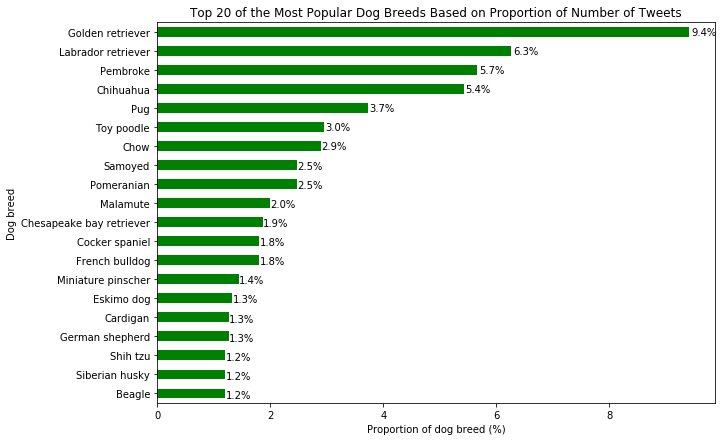

In [367]:
#Visualizing the proportions of the most popular dog breeds
post_per_breed = wrd_final.predicted_dog_breed.value_counts()
prop_post_per_breed= post_per_breed.apply(lambda x: x * 100/ wrd_final.predicted_dog_breed.count());

ax = prop_post_per_breed[:20].sort_values(ascending=True).plot(kind='barh', 
                                              title='Top 20 of the Most Popular Dog Breeds Based on Proportion of Number of Tweets',
                                              color='green', 
                                              figsize=(10,7));
ax.set_xlabel("Proportion of dog breed (%)")
ax.set_ylabel("Dog breed")

height = 0
for p in ax.patches:
    height += p.get_height()
    ax.annotate(str(round(p.get_width(),1)) + '%', (p.get_width() * 1.005, p.get_y()*1.005))

We can see in the above visualization, that by far the most popular dogs are the Golden and Labrador Retrievers, taking over 15% of the total posts.

It is also interesting that the most popular dog, the Golden Retriever (9.3%) is almost 3 times more popular than Pug, the 5th on the list (3.8%). This is a huge difference!

##### 2) Now let's look at what proportion of the likes and re-tweets these dogs receive? Are they also the most popular when it comes to liking them?

In [368]:
#Calculating the total likes per breed
favorites_per_dog_breed = wrd_final.groupby('predicted_dog_breed').sum()['favorite_count']

#Calculating the average like per post per breed
avg_favorites_per_breed = (favorites_per_dog_breed / post_per_breed)

#Calculating the proportions of average likes per breed
prop_avg_favorites_per_breed = avg_favorites_per_breed / avg_favorites_per_breed.sum() * 100

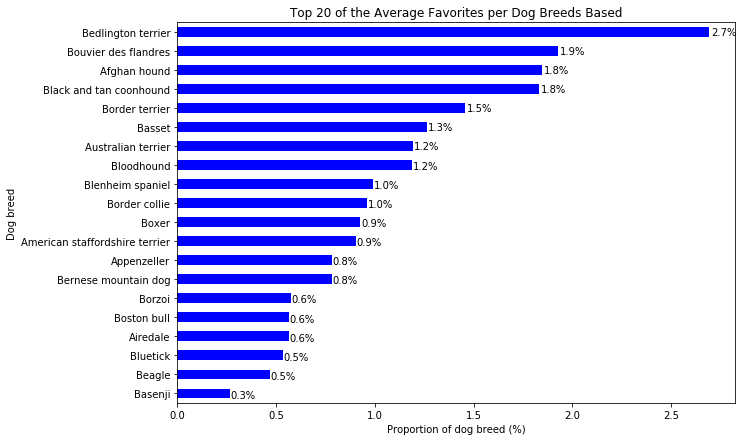

In [369]:
#Let's visualize the average favourites per dog breed
ax = prop_avg_favorites_per_breed[:20].sort_values(ascending=True).plot(kind='barh', 
                                                                    title='Top 20 of the Average Favorites per Dog Breeds Based',
                                                                    color='blue', 
                                                                    figsize=(10,7));
ax.set_xlabel("Proportion of dog breed (%)")
ax.set_ylabel("Dog breed")

height = 0
for p in ax.patches:
    height += p.get_height()
    ax.annotate(str(round(p.get_width(),1)) + '%', (p.get_width() * 1.005, p.get_y()*1.005))

We can clearly see that the average favorites per breed is a completely different list than the popularity based on number of posts per breed. Our top two retrievers are not even in the list!!!

It is also clear that the average favorites per breed is much more evenly distributed than the popularity just by looking at the range of values (we only see the maxium in the above lists, but the minimum can't be smaller than 0 so we have a sense about the differences in the two range).

##### 3) Let's confirm it by calculating the standard deviations of the two lists, but before we do that, calculate the same list for the average re-tweets, and visualize them as well.

In [370]:
#Calculating the total re-tweets per breed
retweets_per_breed = wrd_final.groupby('predicted_dog_breed').sum()['retweet_count']

#Calculating the average like per post per breed
avg_retweets_per_breed = (retweets_per_breed / post_per_breed)

#Calculating the proportions of average likes per breed
prop_avg_retweets_per_breed = avg_retweets_per_breed /avg_retweets_per_breed.sum() * 100

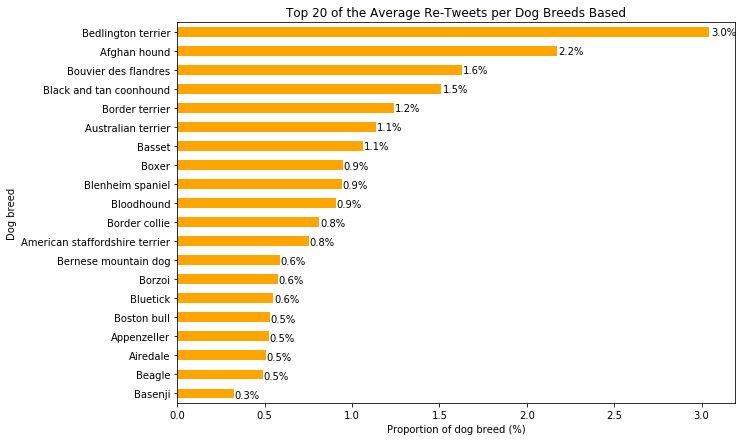

In [371]:
#Let's visualize the average re-tweet per dog breed
ax = prop_avg_retweets_per_breed[:20].sort_values(ascending=True).plot(kind='barh', 
                                                                    title='Top 20 of the Average Re-Tweets per Dog Breeds Based',
                                                                    color='orange', 
                                                                    figsize=(10,7));
ax.set_xlabel("Proportion of dog breed (%)")
ax.set_ylabel("Dog breed")

height = 0
for p in ax.patches:
    height += p.get_height()
    ax.annotate(str(round(p.get_width(),1)) + '%', (p.get_width() * 1.005, p.get_y()*1.005))

The distribution of top 20 re-tweets resemble the average favorites per breed more!
##### 4) Let's look at the standard deviations!

In [372]:
measures_per_breed = {'Measure': ['Proportion of posts per breed', 'Proportion of average favorites per breed', 'Proportion of average re-tweets per breed'],
                      'Standard Deviation': [np.std(prop_post_per_breed), np.std(prop_avg_favorites_per_breed), np.std(prop_avg_retweets_per_breed)]}
measures_per_breed = pd.DataFrame(measures_per_breed).set_index('Measure')
measures_per_breed

,Standard Deviation
Measure,
Proportion of posts per breed,1.321613
Proportion of average favorites per breed,0.506012
Proportion of average re-tweets per breed,0.525349


We can indeed see that the proportions of average favorites and re-tweets are much more similar to each other than to the proportions of posts per breed. They have a very similar standard deviation.

They are also much more evenly distributed than the proportions of posts per breed. The different values varies closer around the mean. We can see this from the smaller standard deviations.

##### 5) Let's now visualize the relationship between these three values to see whether we can expect any correlation between any two of them!

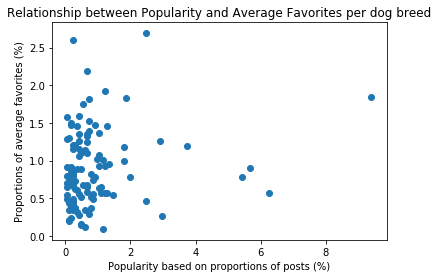

In [373]:
#plotting the relationship between 'Popularity based on proportion of posts per breed' and 'Proportion of average favorites per breed'
plt.scatter(prop_post_per_breed, prop_avg_favorites_per_breed);
plt.title("Relationship between Popularity and Average Favorites per dog breed")
plt.xlabel("Popularity based on proportions of posts (%)")
plt.ylabel("Proportions of average favorites (%)")
plt.show()

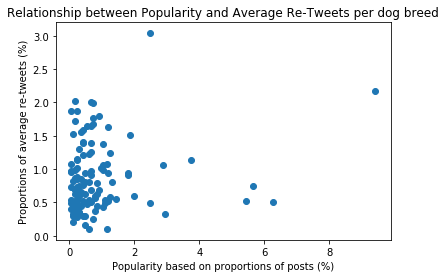

In [374]:
#plotting the relationship between 'Proportion of posts per breed' and 'Proportion of average re-tweets per breed'
plt.scatter(prop_post_per_breed, prop_avg_retweets_per_breed);
plt.title("Relationship between Popularity and Average Re-Tweets per dog breed")
plt.xlabel("Popularity based on proportions of posts (%)")
plt.ylabel("Proportions of average re-tweets (%)")
plt.show()

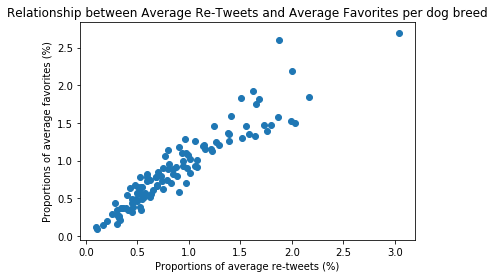

In [375]:
#plotting the relationship between 'Proportion of average re-tweets per breed' and 'Proportion of average favorites per breed'
plt.scatter(prop_avg_retweets_per_breed, prop_avg_favorites_per_breed);
plt.title("Relationship between Average Re-Tweets and Average Favorites per dog breed")
plt.xlabel("Proportions of average re-tweets (%)")
plt.ylabel("Proportions of average favorites (%)")
plt.show()

We can clearly see from the above scatter plots that there is no correlation between the average re-tweets or the average favorites and the popularity of the dog breed, but there is a strong correlation between the average re-tweets and the average favorites!

This means that a more popular dog breed is not more likely to be re-tweeted or favorited.
But there is a positive correlation between re-tweets and favorites. We can read from the plot that as the number of re-tweets increase the number of favorites increase as well. This means that if a dog breed was liked, it is more likely to be re-tweeted and vice-versa as well.

Although it would probably be better to examine without the grupping by dog breed. Just simply look at the correlation between likes are re-tweets per post.

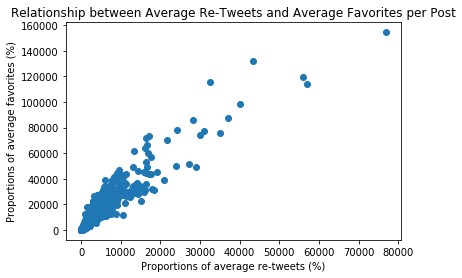

In [376]:
#Visualizing the correlatoin between retweet cound per post and favorite count per post
plt.scatter(wrd_final.retweet_count, wrd_final.favorite_count);
plt.title("Relationship between Average Re-Tweets and Average Favorites per Post")
plt.xlabel("Proportions of average re-tweets (%)")
plt.ylabel("Proportions of average favorites (%)")
plt.show()

We can still observe that the correlation is there, so if a post has been liked it is also more likely to be re-tweeted.

##### 6) Let's confirm these conclusions with Linear Regression.

In [377]:
# Calculating linear regression between the Popularity of dog breed based on number of posts, 
# and the Average favorites per dog breed
import statsmodels.api as sm
df1 = pd.DataFrame(prop_post_per_breed)
df2 = pd.DataFrame(prop_avg_favorites_per_breed, columns=['prop_avg_favorites_per_breed'])
df3 = pd.DataFrame(prop_avg_retweets_per_breed, columns=['prop_avg_retweet_per_breed'])
df = df1.join(df2).join(df3)
df.rename({'predicted_dog_breed' : 'prop_post_per_breed'}, axis=1, inplace=True)
df['intercept'] = 1
lm = sm.OLS(df['prop_post_per_breed'], df[['intercept', 'prop_avg_favorites_per_breed']])
results = lm.fit()
results.summary()

/opt/conda/lib/python3.6/site-packages/statsmodels/compat/pandas.py:56: FutureWarning: The pandas.core.datetools module is deprecated and will be removed in a future version. Please use the pandas.tseries module instead.
  from pandas.core import datetools


<class 'statsmodels.iolib.summary.Summary'>
"""
                             OLS Regression Results                            
===============================================================================
Dep. Variable:     prop_post_per_breed   R-squared:                       0.027
Model:                             OLS   Adj. R-squared:                  0.018
Method:                  Least Squares   F-statistic:                     3.102
Date:                 Tue, 04 Aug 2020   Prob (F-statistic):             0.0810
Time:                         09:26:17   Log-Likelihood:                -190.29
No. Observations:                  113   AIC:                             384.6
Df Residuals:                      111   BIC:                             390.0
Df Model:                            1                                         
Covariance Type:             nonrobust                                         
================================================================================================
                                   coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------------
intercept                        0.5039      0.249      2.021      0.046       0.010       0.998
prop_avg_favorites_per_breed     0.4306      0.245      1.761      0.081      -0.054       0.915
==============================================================================
Omnibus:                      119.992   Durbin-Watson:                   0.133
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             1641.264
Skew:                           3.750   Prob(JB):                         0.00
Kurtosis:                      20.097   Cond. No.                         3.76
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

We can see a very low R-squared value of 0.027 which means the variance in the average likes of dog breed only explains 2.7% of the variance in the popularity of the popularity of the dog breed based on the number of posts. This implies very low, practically no correlation between the two variables.

We can also see that the p value for the prop_avg_favorites_per_breed coefficient is 0.081 (which is higher than 0.05), meaning the prop_avg_favorites_per_breed variable is not statistically significant in relating to the prop_post_per_breed variable.

This confirms our visual observation, that the popularity of a dog breed based on the number of posts does not imply higher amount of likes for the same dog breed.

In [378]:
# Calculating linear regression between the Average re-tweet per dog breed, 
# and the Average favorites per dog breed
wrd_final['intercept'] = 1
lm = sm.OLS(wrd_final.retweet_count, wrd_final[['intercept','favorite_count']])
results = lm.fit()
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:          retweet_count   R-squared:                       0.863
Model:                            OLS   Adj. R-squared:                  0.863
Method:                 Least Squares   F-statistic:                 1.235e+04
Date:                Tue, 04 Aug 2020   Prob (F-statistic):               0.00
Time:                        09:26:17   Log-Likelihood:                -17286.
No. Observations:                1963   AIC:                         3.458e+04
Df Residuals:                    1961   BIC:                         3.459e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==================================================================================
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
intercept       -315.4011     44.111     -7.150      0.000    -401.910    -228.892
favorite_count     0.3343      0.003    111.138      0.000       0.328       0.340
==============================================================================
Omnibus:                     1762.529   Durbin-Watson:                   1.255
Prob(Omnibus):                  0.000   Jarque-Bera (JB):           234452.967
Skew:                           3.668   Prob(JB):                         0.00
Kurtosis:                      56.034   Cond. No.                     1.77e+04
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.77e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

We can see a high R-squared value of 0.863 which means the variance in the average favorites explains 86.3% of the variance in the re-tweets of a posts. This is implies very strong positive correlation between the two variables.

We can also see that the p value for the favorite_count coefficient is 0.000 (which is lower than 0.05), meaning the prop_avg_favorites_per_breed variable is statistically significant in relating to the prop_post_per_breed variable on 95% confidence level.

Based on the favorite_count coefficient (0.3343) we can expect that the number of re-tweets of the average post is 33.43% of the favorites received.

This confirms our visual observation, that more favorites imply more re-tweets. 



### Our final conclusions and insights:
1) The most popular dog breed is Golden Retriever, but interrestingly this breed is not in the lists of top20 most favorited and top20 most retweeted breeds! The top liked and re-tweeted breed is the Bedlington terrier.

2) The popularity of a dog breed based on the proportion of posts that specific dog breed has does not imply more favorites and re-tweets (one kind of popularity (number of posts) does not imply other type of popularity (favorites and re-tweets).

3) More favorites imply more re-tweets.



<a id='report'></a>
[Table of content](#top)
### Reporting for this Project


Create a 300-600 word written report called wrangle_report.pdf or wrangle_report.html that briefly describes your wrangling efforts. This is to be framed as an internal document.

Create a 250-word-minimum written report called act_report.pdf or act_report.html that communicates the insights and displays the visualization(s) produced from your wrangled data. This is to be framed as an external document, like a blog post or magazine article, for example.

Both of these documents can be created in separate Jupyter Notebooks using the Markdown functionality of Jupyter Notebooks, then downloading those notebooks as PDF files or HTML files (see image below). You might prefer to use a word processor like Google Docs or Microsoft Word, however.



In [398]:
wrd_final.sort_values('favorite_count', ascending=False)

,tweet_id,timestamp,source,text,rating_numerator,rating_denominator,name,dog_stage,tw_arch_clean,retweet_count,favorite_count,followers_count,jpg_url,predicted_dog_breed,intercept
763,744234799360020481,2016-06-18 18:26:18,Twitter for iPhone,Here's a doggo realizing you can stand in a po...,13.0,10,None,doggo,NaN,76794,154564,8816463,https://pbs.twimg.com/ext_tw_video_thumb/74423...,Labrador retriever,1
302,822872901745569793,2017-01-21 18:26:02,Twitter for iPhone,Here's a super supportive puppo participating ...,13.0,10,None,puppo,NaN,43275,131839,8816455,https://pbs.twimg.com/media/C2tugXLXgAArJO4.jpg,Lakeland terrier,1
393,807106840509214720,2016-12-09 06:17:20,Twitter for iPhone,This is Stephan. He just wants to help. 13/10 ...,13.0,10,Stephan,NaN,NaN,55987,119413,8816455,https://pbs.twimg.com/ext_tw_video_thumb/80710...,Chihuahua,1
107,866450705531457537,2017-05-22 00:28:40,Twitter for iPhone,This is Jamesy. He gives a kiss to every other...,13.0,10,Jamesy,pupper,NaN,32587,115414,8816453,https://pbs.twimg.com/media/DAZAUfBXcAAG_Nn.jpg,French bulldog,1
798,739238157791694849,2016-06-04 23:31:25,Twitter for iPhone,Here's a doggo blowing bubbles. It's downright...,13.0,10,None,doggo,NaN,57062,114296,8816463,https://pbs.twimg.com/ext_tw_video_thumb/73923...,Eskimo dog,1
58,879415818425184262,2017-06-26 19:07:24,Twitter for iPhone,This is Duddles. He did an attempt. 13/10 some...,13.0,10,Duddles,NaN,NaN,40179,98452,8815791,https://pbs.twimg.com/ext_tw_video_thumb/87941...,English springer,1
326,819004803107983360,2017-01-11 02:15:36,Twitter for iPhone,This is Bo. He was a very good First Doggo. 14...,14.0,10,Bo,NaN,NaN,37050,87340,8816455,https://pbs.twimg.com/media/C12whDoVEAALRxa.jpg,Standard poodle,1
133,859196978902773760,2017-05-02 00:04:57,Twitter for iPhone,We only rate dogs. This is quite clearly a smo...,12.0,10,quite,NaN,NaN,28324,85744,8815793,https://pbs.twimg.com/ext_tw_video_thumb/85919...,Malamute,1
92,870374049280663552,2017-06-01 20:18:38,Twitter for iPhone,This is Zoey. She really likes the planet. Wou...,13.0,10,Zoey,NaN,NaN,24299,77992,8816453,https://pbs.twimg.com/media/DBQwlFCXkAACSkI.jpg,Golden retriever,1
1402,678399652199309312,2015-12-20 02:20:55,Twitter for iPhone,This made my day. 12/10 please enjoy https://t...,12.0,10,None,NaN,NaN,30924,77623,8815804,https://pbs.twimg.com/ext_tw_video_thumb/67839...,Bedlington terrier,1
